<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Importation de la librairie plotly express
import plotly.express as px

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("/content/web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("/content/erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison= pd.read_excel("/content/liaison.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [6]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [7]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [8]:
#Afficher les 5 premières lignes de la table
df_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [9]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
doublons= df_erp.duplicated()
nombre_doublons= doublons.sum()# True = 1, False = 0
print(nombre_doublons)
df_erp.loc[df_erp[['product_id','onsale_web',	'price','stock_quantity','stock_status','purchase_price']].duplicated(keep=False),:]

0


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price


In [10]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp['stock_status'].unique()
#À quelle(s) autre(s) colonne(s) sont-elles liées ? stock_quantity

array(['instock', 'outofstock'], dtype=object)

In [11]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2']= np.where(df_erp['stock_quantity']<= 0,'outofstock','instock')
df_erp['stock_status_2']

0         instock
1         instock
2      outofstock
3         instock
4         instock
          ...    
820       instock
821       instock
822       instock
823       instock
824       instock
Name: stock_status_2, Length: 825, dtype: object

In [12]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]
#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [13]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
df_erp['status_diff'] =df_erp["stock_status"] == df_erp["stock_status_2"]
df_erp['status_diff'].sum()


823

In [14]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
# Only grab where nombre_diff == 0
mask = df_erp['status_diff'] == 0
df = df_erp[mask]
df

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,status_diff
4,4039,1,46.0,3,outofstock,23.77,instock,False
398,4885,1,18.7,0,instock,9.66,outofstock,False


In [15]:
#Corriger la ou les données incohérentes
# Convert
df_erp['stock_status']=df_erp['stock_quantity'].apply(lambda x:'instock' if x>0 else 'outofstock')
#Verification en utilisant le même code que plus haut pour afficher les problemes
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,status_diff
0,3847,1,24.2,16,instock,12.88,instock,True
1,3849,1,34.3,10,instock,17.54,instock,True
2,3850,1,20.8,0,outofstock,10.64,outofstock,True
3,4032,1,14.1,26,instock,6.92,instock,True
4,4039,1,46.0,3,instock,23.77,instock,False
...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock,True
821,7204,0,45.0,9,instock,24.18,instock,True
822,7247,1,54.8,6,instock,27.18,instock,True
823,7329,0,26.5,14,instock,13.42,instock,True


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [16]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
df_erp.loc[df_erp['price'].isnull(),:]#dataframe price is null
price_null =df_erp['price'].isnull()
prix_null= price_null.sum()
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(prix_null)) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
min_prix= df_erp['price'].min()
print("Le prix minimum de la colonne price: {}".format(min_prix))
#Afficher le prix maximum de la colonne "price"
max_prix= df_erp['price'].max()
print("Le prix maximum de la colonne price:{}".format(max_prix))
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
prix_negatif= df_erp.loc[df_erp['price']<0,'price']#trouver indices où les prix inférieurs à 0
prix_negatif
print("Le prix inférieurs à 0:{}".format(prix_negatif))

Nombres d'article avec un prix non renseignés: 0
Le prix minimum de la colonne price: -20.0
Le prix maximum de la colonne price:225.0
Le prix inférieurs à 0:151   -20.0
469    -8.0
739    -9.1
Name: price, dtype: float64


In [17]:
#Analyser les raisons: vérifier ces lignes ou les prix < 0, examiner le contexte de ces lignes pour comprendre pourquoi les prix sont négatif (une erreur de saisie...)
df_prix_negatif=df_erp[df_erp['price'] < 0]
df_prix_negatif

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,status_diff
151,4233,0,-20.0,0,outofstock,10.33,outofstock,True
469,5017,0,-8.0,0,outofstock,4.34,outofstock,True
739,6594,0,-9.1,19,instock,4.61,instock,True


In [18]:
# Corriger: décider si ces valeurs doivent être corrigées (remplacées par la valeur absolue)
df_erp['price']= df_erp['price'].apply(lambda x: abs(x) if x<0 else x)
df1=df_erp[df_erp['price'] < 0]
df1


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,status_diff


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [19]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
min_stock=df_erp['stock_quantity'].min()
print("La quantité minimum de la colonne stock_quantity:{}".format(min_stock))
#Afficher la quantité maximum de la colonne "stock_quantity"
max_stock=df_erp['stock_quantity'].max()
print("La quantité maximum de la colonne stock_quantity:{}".format(max_stock))
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
stock_negatif= df_erp.loc[df_erp['stock_quantity']<0,'stock_quantity']
print("Les stocks inférieurs à 0:{}".format (stock_negatif))


La quantité minimum de la colonne stock_quantity:-10
La quantité maximum de la colonne stock_quantity:145
Les stocks inférieurs à 0:449   -10
573    -1
Name: stock_quantity, dtype: int64


In [20]:
# Filtrere les données et analyser les raisons pour comprendre pourquoi les stocks inférieurs à 0
df_stock_negatif= df_erp[df_erp['stock_quantity']<0]
df_stock_negatif

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,status_diff
449,4973,0,10.0,-10,outofstock,4.96,outofstock,True
573,5700,1,44.5,-1,outofstock,22.30,outofstock,True


In [21]:
#Corriger: remplacer par la valeur absolue
df_erp['stock_quantity']= df_erp['stock_quantity'].apply(lambda x:abs(x)if x<0 else x)
df_stock_negatif= df_erp[df_erp['stock_quantity']<0]
df_stock_negatif

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,status_diff


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [22]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles
df_erp['onsale_web'].unique()
# 1: ON SALE, 0: Not on sale

array([1, 0])

In [23]:
#Quelles sont les colonnes à conserver selon vous?
# product_id, onsale_web, price, stock_quantity, stock_status, purchase_price

In [24]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante
#avec la colonne "stock_status".
df_erp= df_erp.drop(columns=['stock_status_2','status_diff'])

In [25]:
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48
821,7204,0,45.0,9,instock,24.18
822,7247,1,54.8,6,instock,27.18
823,7329,0,26.5,14,instock,13.42


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [26]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price :
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
non_purchase_prix=df_erp['purchase_price'].isnull()
x= non_purchase_prix.sum()
print("Les prix non renseignés dans la colonne purchase_price: {}".format(x))
#Afficher le prix minimum de la colonne "purchase_price"
min_purchase= df_erp['purchase_price'].min()
print("Le prix minimum de la colonne purchase_price:{}".format(min_purchase))
#Afficher le prix maximum de la colonne "purchase_price"
max_purchase= df_erp['purchase_price'].max()
print("Le prix maximum de la colonne purchase_price:{}".format(max_purchase))

Les prix non renseignés dans la colonne purchase_price: 0
Le prix minimum de la colonne purchase_price:2.74
Le prix maximum de la colonne purchase_price:137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [27]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [28]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [29]:
#Selon vous, quelles sont les colonnes à conserver ?
# sku: pour identifier les produits.
# total_sales: pour analyser les performances de vente.
df_web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'product_type', 'post_title',
       'post_excerpt', 'post_status', 'comment_status', 'ping_status',
       'post_password', 'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [30]:
df_web.head(3)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,11862,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-12 13:46:23,...,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,16057,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-04-17 15:29:17,...,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,14692,0,0,0,0.0,5.0,taxable,NaN,2.0,2019-03-19 10:06:47,...,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [31]:
#Visualisation des valeurs de la colonne sku
df_web['sku'].unique()
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
# La colonne sku contient des valeur qui sont des chaîne de caractères: '13127-1','bon-cadeau-25-euros' et des valeurs manquantes Nan

array([11862, 16057, 14692, 16295, 15328, 15471, 16515, 16246, nan, 13572,
       16513, 16585, 16269, 15526, 12869, 15575, 11586, 14338, 15425,
       16560, 15361, 13809, 11587, 15022, 14323, 16342, 16029, 15475,
       13754, 14680, 15875, 9636, 13849, 13662, 16564, 13557, 15429,
       14712, 15032, 15481, 15448, 16580, 15441, 804, 15300, 13958, 16071,
       15678, 13895, 15711, 12882, 16053, 13766, 16247, 12640, 15292,
       15476, 15670, 16189, 16038, 14864, 16044, 15324, 15531, 15953,
       15413, 15733, 14366, 15895, 15892, 16472, 15185, 16010, 15793,
       15849, 12315, 15741, 15934, 15148, 15781, 15659, 15106, 15490,
       14507, 14149, 16307, 13736, 14090, 16037, 15758, 14661, 12587,
       15337, 15489, 15201, 16305, 16131, 13435, 15747, 12203, 14509,
       14768, 16262, 14561, 16505, 15717, 16129, 13460, 15871, 15940,
       11602, 13127, 13520, 15480, 13032, 15436, 15269, 15910, 19821,
       16263, 15138, 15146, 15126, 15482, 16186, 13905, 16540, 15856,
       1567

In [32]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
sku_check=('13127-1','bon-cadeau-25-euros')
df_code= df_web[df_web['sku'].isin(sku_check)]# isin qui est destinée à tester l'appartenance à une liste de valeurs.
df_code

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
272,13127-1,0,0,0,0.0,4.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
842,bon-cadeau-25-euros,0,0,0,0.0,7.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1117,13127-1,0,0,0,0.0,4.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1387,bon-cadeau-25-euros,0,0,0,0.0,7.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [33]:
#Identifier les lignes sans code articles
df_web[df_web['sku'].isna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
8,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1429,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Analyser les valeurs uniques dans la colonne 'sku' et la fréquence des doublons
unique_skus = df_web['sku'].value_counts(dropna=False)
unique_skus

sku
NaN        85
11862.0     2
15629.0     2
3507.0      2
14773.0     2
           ..
12639.0     2
15466.0     2
15184.0     2
13078.0     2
14569.0     2
Name: count, Length: 715, dtype: int64

In [35]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre

In [36]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons? product_type = product
sku_doublon= df_web['sku'].duplicated()
sku_doublon_nombre= sku_doublon.sum()
print(f'Le nombre de doublon :{sku_doublon_nombre}')


Le nombre de doublon :798


In [37]:
#Examiner les lignes avec des doublons pour décider si on peut les supprimer ou les conserver.Filtrer les lignes ou 'sku' est 11862
dfd=df_web[df_web['sku']== 11862]
dfd

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,11862,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-12 13:46:23,...,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1001,11862,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 13:46:23,...,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [38]:
#Supprimer les doublons
#sku en double avec la valuer de post_type sont different: product et attachement; donc il faut suprimier toutes les lignes ayant un 'sku' en double avec la valeur de post_type=='attachement'.
#Identifiez les 'sku'dupliqué où 'post_type== attachement'
df_web= df_web[df_web['post_type']!= 'attachment'].reset_index(drop=True)
df_web.head(5)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,14692,0,0,0,0.0,5.0,taxable,NaN,2.0,2019-03-19 10:06:47,...,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15328,0,0,0,0.0,2.0,taxable,NaN,2.0,2019-03-27 18:05:09,...,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,16515,0,0,0,0.0,10.0,taxable,NaN,2.0,2018-06-02 09:31:31,...,chateau-turcaud-bordeaux-rouge-cuvee-majeure-2018,2020-08-27 10:11:12,2020-08-27 08:11:12,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16585,0,0,0,0.0,15.0,taxable,NaN,2.0,2018-02-16 14:03:16,...,xavier-frissant-touraine-sauvignon-2019,2020-08-27 09:30:36,2020-08-27 07:30:36,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [39]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_web_null= df_web[df_web['sku'].isna()]
df_web_null
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_web_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 3 to 774
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           2 non-null      object        
 13  post_title 

In [40]:
df_web['tax_status'].unique()

array(['taxable', nan], dtype=object)

In [41]:
#3 - Que constatez-vous?
# Les lignes sans code article sont non renseignées, à l'exception de duex lignes qui contiennent des valeurs dans les autres colonne. Il est donc nécessaire d'analyser plus en détail ces deux lignes.
df_web_null_2= df_web[(df_web['sku'].isna())&(df_web['total_sales'].notnull())]
df_web_null_2


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
586,NaN,0,0,0,0.0,-56.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
588,NaN,0,0,0,0.0,-17.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [42]:
#3 - Que constatez-vous?
# Ces deux lignes ont les valeurs négatif sur le colonne total_sales. Donc, il faut éliminer les lignes avec le valeur manquante dans le colonne SKU
df_web=df_web.dropna(subset=['sku']).reset_index(drop=True)#subset permet de chosir null dans la colonne sku

In [43]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web= df_web.drop(['virtual', 'downloadable','tax_class', 'post_author','post_date',
       'post_date_gmt', 'post_content', 'post_title',
       'post_excerpt', 'post_status', 'comment_status', 'ping_status',
       'post_password', 'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order','post_type', 'post_mime_type'],axis=1)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [44]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [45]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()
df_liaison.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


,id_web,product_id
0,15298,3847
1,15296,3849
2,15300,3850
3,19814,4032
4,19815,4039


In [46]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
product_id_dup=df_liaison['product_id'].duplicated()
product_id_dup.sum()

0

In [47]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
web_id_dup=df_liaison['id_web'].duplicated()
web_id_dup.sum()

90

In [48]:
web_id_dup=df_liaison[df_liaison['id_web'].duplicated()]
web_id_dup

,id_web,product_id
49,NaN,4090
50,NaN,4092
119,NaN,4195
131,NaN,4209
151,NaN,4233
...,...,...
817,NaN,7196
818,NaN,7200
819,NaN,7201
820,NaN,7203


In [49]:
#Avons-nous des articles sans correspondances?
id_web_null=df_liaison['id_web'].isnull()
y= id_web_null.sum()
print('Nombre des articles sans correspondances: {}'.format(y))

Nombre des articles sans correspondances: 91


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [50]:
df_erp.loc[:,'product_id']= df_erp['product_id'].astype(str)
df_web.loc[:,'sku']= df_web['sku'].astype(str)
df_liaison.loc[:,'id_web']= df_liaison['id_web'].astype(str)
df_liaison.loc[:,'product_id']= df_liaison['product_id'].astype(str)

In [51]:
#Fusion des fichiers df_erp et df_liaison
df_merge= df_erp.merge(df_liaison,on= 'product_id')
df_merge

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web
0,3847,1,24.2,16,instock,12.88,15298
1,3849,1,34.3,10,instock,17.54,15296
2,3850,1,20.8,0,outofstock,10.64,15300
3,4032,1,14.1,26,instock,6.92,19814
4,4039,1,46.0,3,instock,23.77,19815
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,nan
821,7204,0,45.0,9,instock,24.18,nan
822,7247,1,54.8,6,instock,27.18,13127-1
823,7329,0,26.5,14,instock,13.42,14680-1


In [52]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
# Identification des lignes qui n'ont pas de correspondance dans df_erp ou df_liaison
no_match_df_erp = df_merge[df_merge['product_id']=='nan']
print("Lignes dans df_web sans correspondance dans df_erp:")
print(no_match_df_erp)

Lignes dans df_web sans correspondance dans df_erp:
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, id_web]
Index: []


In [53]:
no_match_df_liaison = df_merge[df_merge['id_web']=='nan']
print("Lignes dans df_liaison sans correspondance dans df_liaison:")
print(no_match_df_liaison)

Lignes dans df_liaison sans correspondance dans df_liaison:
    product_id  onsale_web  price  stock_quantity stock_status  \
19        4055           0   86.1               0   outofstock   
49        4090           0   73.0               0   outofstock   
50        4092           0   47.0               0   outofstock   
119       4195           0   14.1               0   outofstock   
131       4209           0   73.5               0   outofstock   
..         ...         ...    ...             ...          ...   
817       7196           0   31.0              55      instock   
818       7200           0   31.0               6      instock   
819       7201           0   31.0              18      instock   
820       7203           0   45.0              30      instock   
821       7204           0   45.0               9      instock   

     purchase_price id_web  
19            37.88    nan  
49            33.79    nan  
50            25.25    nan  
119            7.36    nan  
13

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [54]:
#Fusionnez les datasets df_merge et df_web
df_final=df_web.merge(df_merge,left_on='sku',right_on='id_web')
df_final

,sku,rating_count,average_rating,total_sales,tax_status,product_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web
0,14692,0,0.0,5.0,taxable,Vin,0.0,5794,1,21.70,15,instock,10.65,14692
1,15328,0,0.0,2.0,taxable,Vin,0.0,5827,1,55.00,4,instock,29.55,15328
2,16515,0,0.0,10.0,taxable,Vin,0.0,4964,1,12.10,23,instock,6.50,16515
3,16585,0,0.0,15.0,taxable,Vin,0.0,4223,1,9.70,42,instock,4.81,16585
4,12869,0,0.0,7.0,taxable,Vin,0.0,5900,1,18.25,21,instock,8.96,12869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,13074,0,0.0,4.0,taxable,Vin,0.0,4073,1,77.80,8,instock,40.60,13074
710,16322,0,0.0,0.0,taxable,Vin,0.0,4198,1,5.80,0,outofstock,2.97,16322
711,12365,0,0.0,10.0,taxable,Vin,0.0,5630,1,28.00,23,instock,14.61,12365
712,16326,0,0.0,5.0,taxable,Vin,0.0,5962,1,30.00,8,instock,15.50,16326


In [55]:
#Avons-nous des lignes sans correspondances?
# Identification des lignes qui n'ont pas de correspondance dans df_merge ou df_web
no_match_df_merge = df_final[df_final['id_web']== 'nan']
print("Lignes dans df_web sans correspondance dans df_merge:")
print(no_match_df_merge)

Lignes dans df_web sans correspondance dans df_merge:
Empty DataFrame
Columns: [sku, rating_count, average_rating, total_sales, tax_status, product_type, comment_count, product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, id_web]
Index: []


In [56]:
# Identification des lignes qui n'ont pas de correspondance dans df_web
no_match_df_web = df_final[df_final['sku']=='nan']
print("Lignes dans df_web sans correspondance dans df_web:")
print(no_match_df_web)

Lignes dans df_web sans correspondance dans df_web:
Empty DataFrame
Columns: [sku, rating_count, average_rating, total_sales, tax_status, product_type, comment_count, product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, id_web]
Index: []


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

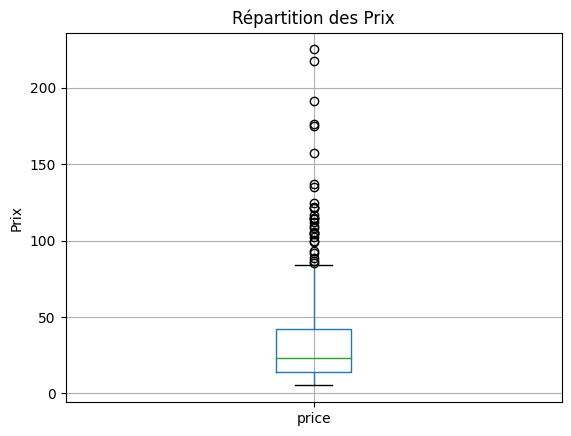

In [57]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
# Création du box plot
ax = df_final.boxplot(column='price',grid=True)  # grid=False pour désactiver la grille de fond
# Titre et labels
ax.set_title('Répartition des Prix')
ax.set_ylabel('Prix')
# Afficher le graphique
plt.show()

In [58]:
#Autre méthode avec plotly express
fig=px.box(df_final,x='price', title= 'La répartition des prix ')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [59]:
#Calculer la moyenne du prix
mean=round(np.mean(df_final['price']),2)
print('la moyenne du prix: {}'.format(mean))
#Calculer l'écart-type du prix
ecart_type= round(np.std(df_final['price']),2)
print('l\'écart-type du prix: {}'.format(ecart_type))
#Calculer le Z-score
df_final['Z-score']= round((df_final['price']- mean)/ecart_type,3)
df_final

la moyenne du prix: 32.33
l'écart-type du prix: 27.58


,sku,rating_count,average_rating,total_sales,tax_status,product_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,Z-score
0,14692,0,0.0,5.0,taxable,Vin,0.0,5794,1,21.70,15,instock,10.65,14692,-0.385
1,15328,0,0.0,2.0,taxable,Vin,0.0,5827,1,55.00,4,instock,29.55,15328,0.822
2,16515,0,0.0,10.0,taxable,Vin,0.0,4964,1,12.10,23,instock,6.50,16515,-0.734
3,16585,0,0.0,15.0,taxable,Vin,0.0,4223,1,9.70,42,instock,4.81,16585,-0.821
4,12869,0,0.0,7.0,taxable,Vin,0.0,5900,1,18.25,21,instock,8.96,12869,-0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,13074,0,0.0,4.0,taxable,Vin,0.0,4073,1,77.80,8,instock,40.60,13074,1.649
710,16322,0,0.0,0.0,taxable,Vin,0.0,4198,1,5.80,0,outofstock,2.97,16322,-0.962
711,12365,0,0.0,10.0,taxable,Vin,0.0,5630,1,28.00,23,instock,14.61,12365,-0.157
712,16326,0,0.0,5.0,taxable,Vin,0.0,5962,1,30.00,8,instock,15.50,16326,-0.084


In [60]:
#Quel est le seuil prix dont z-score est supérieur à 3? (où le Z-score des prix est supérieur à 3, indiquant des outliers potentiellement intéressants à analyser plus en détail.)
seuil= 3
supérieur= df_final[df_final['Z-score']>seuil]
seuil_prix= supérieur['price'].min()
print(f'Le seuil prix dont z-score est supérieur à 3: {seuil_prix}')
print("Outlier basé sur le prix:")
print(supérieur[['price','Z-score']])

Le seuil prix dont z-score est supérieur à 3: 116.4
Outlier basé sur le prix:
     price  Z-score
153  124.8    3.353
210  175.0    5.173
212  157.0    4.520
226  137.0    3.795
302  116.4    3.048
319  191.3    5.764
392  135.0    3.723
406  121.0    3.215
419  122.0    3.251
448  176.0    5.209
598  225.0    6.986
630  121.0    3.215
689  217.5    6.714


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [61]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_final['price'].describe()

count    714.000000
mean      32.333683
std       27.596332
min        5.200000
25%       14.062500
50%       23.450000
75%       42.075000
max      225.000000
Name: price, dtype: float64

In [62]:
#Définissez un seuil pour les articles "outliers" en prix
#Calcul de l'IQR(interquartile range): est la différence entre le troisième quartile (75%) et le premier quartile (25%)
Q1= 14.05
Q3= 42.10
IQR= Q3-Q1
#Seuils pour les Outliers:
seuil_superieur= Q3+ 1.5*IQR
seuil_inferieur= Q1- 1.5*IQR
print(f"Seuil supérieur pour outlier: {seuil_superieur}")
print(f"Seuil inferieur pour outlier: {seuil_inferieur}")

Seuil supérieur pour outlier: 84.17500000000001
Seuil inferieur pour outlier: -28.025000000000002


In [63]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
outlier=df_final[(df_final['price']>seuil_superieur)|(df_final['price']< seuil_inferieur )].reset_index(drop=True)
nombre_outlier=len(outlier)
nombre_df=len(df_final)
#La proportion de l'ensemble du catalogue "outliers"
proportion_outlier= round(nombre_outlier/nombre_df*100,2)
print(f'Nombre d\'articles du catalogue outliers:{nombre_outlier}')
print (f'La proportion de l\'ensemble du catalogue outliers: {proportion_outlier}%')

Nombre d'articles du catalogue outliers:31
La proportion de l'ensemble du catalogue outliers: 4.34%


In [64]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?Pour démontrer si les outliers sont justifiés, vous pouvez analyser ces produits plus en détail :
outlier
outlier['price']=outlier['price'].astype(np.int64)
prix= outlier.groupby('product_type')['price'].mean()
prix

product_type
Champagne    139.000000
Cognac       136.250000
Vin          119.222222
Whisky       109.666667
Name: price, dtype: float64

In [65]:
outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sku             31 non-null     object 
 1   rating_count    31 non-null     int64  
 2   average_rating  31 non-null     float64
 3   total_sales     31 non-null     float64
 4   tax_status      31 non-null     object 
 5   product_type    31 non-null     object 
 6   comment_count   31 non-null     float64
 7   product_id      31 non-null     object 
 8   onsale_web      31 non-null     int64  
 9   price           31 non-null     int64  
 10  stock_quantity  31 non-null     int64  
 11  stock_status    31 non-null     object 
 12  purchase_price  31 non-null     float64
 13  id_web          31 non-null     object 
 14  Z-score         31 non-null     float64
dtypes: float64(5), int64(4), object(6)
memory usage: 3.8+ KB


In [68]:
#Comparer avec des produits similaires sur d'autres marchés ou dans d'autres bases de données.

Comparer avec des produits similaires sur d'autres marchés ou dans d'autres bases de données.

Vin:le prix moyen d'une boutille de vin est entre 5€ et 30€. Le vin rouge peut coûter 28€.

Cognac: Une bouteille standard coûte entre 30€ et 60€, tandis que les cognacs plus fins peuvent facilement dépasser les 100€.

Champagne: Le prix moyen d'une bouteille de champagne est 20€.

Whisky: En moyenne, une bouteille de whisky standard coûte entre 20 € et 50 €.

Dans l'ensemble, les prix sur votre site sont plus élevés que les prix moyens du marché, ce qui suggère une concentration sur des produits haut de gamme et de quanlité supérieure.


In [69]:
#Examiner les avis et évaluations des produits pour voir si la qualité ou la popularité justifie le prix.
outlier['rating_count'].unique()

array([0])

In [70]:
outlier['average_rating'].unique()

array([0.])

In [71]:
#Analyser les caractéristiques détaillées des produits pour comprendre pourquoi ils se distinguent.
outlier['comment_count'].unique()

array([0.])

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [72]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_final['CA']= df_final['price']*df_final['total_sales']
#Calculez la somme de la colonne "ca_par_article"
ca_total= round(df_final['CA'].sum(),2)
#Ce résultat correspond au chiffre d'affaire du site web
print(f'Le chiffre d\'affaire du site web :{ca_total}')

Le chiffre d'affaire du site web :143680.1


In [73]:
###############################
#Palmares des articles en CA
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
#Réinitialiser l'index du dataset par un reset_index
df_ca= df_final.sort_values(['CA'],ascending=[False]).reset_index()
#Afficher les 20 premier articles en CA
df_ca_20= df_ca.head(20)
# Graphique en barres horizontales des 20 premiers articles avec plotly express
fig = px.bar(df_ca_20,
             y='CA',
             x='product_id',
             title='Les top 20 premiers articles par CA')
fig.show()

In [74]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_ca['part CA']= df_ca['CA']/ca_total*100
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_ca['CA_cumulative']= df_ca['part CA'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
ca_80=df_ca[df_ca['CA_cumulative']<=80]
nombre_article_80= ca_80.shape[0]
print(f'Le nombre d\'articles représentant 80% du CA: {nombre_article_80}')
# Nombre total d'articles dans le catalogue
ca_total= df_ca.shape[0]
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion= round(nombre_article_80/ca_total*100,2)
print (f'La proportion des articles représentant 80% du CA:{proportion} %')

Le nombre d'articles représentant 80% du CA: 434
La proportion des articles représentant 80% du CA:60.78 %


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [75]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_sale=df_final.sort_values(['total_sales'],ascending=False).reset_index()
#Réinitialiser l'index du dataset par un reset_index
df_final['total_sales'].max()
#Afficher les 20 premier articles en quantité
df_sale_20= df_sale.head(20)

In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(df_sale_20,
             y='total_sales',
             x='product_id',
             title='Les top 20 premiers articles par vente')
fig.show()

In [77]:
#############################
# Calculer le 20 / 80 en CA #
#############################
#Total sale
sale_total= df_sale['total_sales'].sum()
#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_sale['sale']= round(df_sale['total_sales']/sale_total*100,2)
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_sale['sale_cumumative']= df_sale['sale'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
nombre_sale_80=df_sale[(df_sale['sale_cumumative']<=80)].shape[0]
print(f'Le nombre d\'articles représentant 80% des ventes en quantité: {nombre_sale_80}')
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
nombre_sale= df_sale.shape[0]
proportion_sale= round(nombre_sale_80/nombre_sale*100,2)
print(f'La proportion d\'articles dans le catalogue entier du site web: {proportion_sale}%')

Le nombre d'articles représentant 80% des ventes en quantité: 432
La proportion d'articles dans le catalogue entier du site web: 60.5%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [78]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy

#Création de la colonne Rotation de stock(rotation_stock= COGS_cost_of_good_sold/avg inventory),
df_final['COGS']= df_final['stock_quantity']*df_final['purchase_price']
COGS_total= df_final['COGS'].sum()
avg_inventory= df_final['stock_quantity'].mean()
df_final['rotation_stock']= df_final['COGS']/avg_inventory
#Remplacement des "inf" par 0( inf:infinity result of division by zero)
df_final['rotation_stock']=df_final['rotation_stock'].apply(lambda x: O if x==np.inf else x)
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_final=df_final.sort_values(['rotation_stock'],ascending= False).reset_index(drop=True)
df_flop=df_final[(df_final['rotation_stock']==0) & (df_final['stock_quantity']>0)]
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock( Les produits ayant la plus faible rotation de stock)
df_flop_20= df_final.head(20)
#Rotationde stock high is good
no_stock=df_final[df_final['stock_quantity']==0]

In [ ]:
df_flop_20=df_flop_20.sort_values(['stock_quantity'],ascending= False).reset_index(drop=True)
fig= px.bar(df_flop_20,
            y='stock_quantity',
            x='product_id',
            title='Les 20 des produits qui ont le plus de mois de stock ')
fig.show()

In [83]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_final["Valorisation_stock_euros"] = df_final["stock_quantity"] * df_final["price"]
#Calculer la somme de la colonne "Valorisation_stock_euros"
print("La valorisation de notre stock en euro est de {} €".format(df_final["Valorisation_stock_euros"].sum()))

La valorisation de notre stock en euro est de 494682.4 €


In [84]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
valorisation_nombre=df_final['stock_quantity'].sum()
print(f'La valoriration du nombre de produit en stock: {valorisation_nombre}')

La valoriration du nombre de produit en stock: 16741


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [142]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT(hors tax)
df_final['prixHT']=df_final['price']/1.20
#Création de la colonne Taux de marge
df_final['marge_brut']=df_final['prixHT']-df_final['purchase_price']
df_final['taux_de_marge']=df_final['marge_brut']/df_final['prixHT']

In [143]:
#Afficher le prix minimum de la colonne "taux_marge"
taux_marge_min=df_final['taux_de_marge'].min()
taux_marge_min_2=round(taux_marge_min,2)
print(f'Le taux de marge minimum: {taux_marge_min_2} ')
df_min = df_final[df_final['taux_de_marge'] == taux_marge_min]['price']
# Afficher les valeurs de 'prix' correspondantes
print(f'Le prix minimum {df_min.tolist()}')

Le taux de marge minimum: -6.35 
Le prix minimum [12.65]


In [ ]:
df_final['taux_de_marge']= df_final['taux_de_marge'].apply(lambda x:0 if x==np.inf else x)

In [144]:
#Afficher le prix maximum de la colonne "taux_marge"
taux_marge_max=df_final['taux_de_marge'].max()
taux_marge_max_2= round(taux_marge_max,2)
print(f'Le taux de marge maximum: {taux_marge_max_2} ')
df_max=df_final[df_final['taux_de_marge']== taux_marge_max]['price']
df_max.tolist()
# Afficher les valeurs de 'prix' correspondantes
print(f'Le prix maximum {df_max.tolist()}')

Le taux de marge maximum: 0.48 
Le prix maximum [62.5]


In [138]:
#affichage de la ligne avec un taux de marge inférieur à 0
df_marge_0=df_final[df_final['taux_de_marge']<0]
df_marge_0

,sku,rating_count,average_rating,total_sales,tax_status,product_type,comment_count,product_id,onsale_web,price,...,purchase_price,id_web,Z-score,CA,COGS,rotation_stock,Valorisation_stock_euros,prixHT,marge_brut,taux_de_marge
3,12589,0,0.0,0.0,taxable,Champagne,0.0,4355,1,12.65,...,77.48,12589,-0.714,0.0,7515.56,320.536995,1227.05,10.541667,-66.938333,-6.349881


In [133]:
#création d'un dataframe avec les taux positifs
df_marge_positifs=df_final[df_final['taux_de_marge']>=0]
df_marge_positifs
#Afficher le prix minimum de la colonne "taux_marge"
min_taux=df_marge_positifs['taux_de_marge'].min()
min_taux_2=round(min_taux,2)
print(f'Le taux de marge minimum: {min_taux_2} ')
df_min_taux=df_marge_positifs[df_marge_positifs['taux_de_marge']== min_taux]['price']
print(f'le prix minimum de la taux de marge minimum:{ df_min_taux.tolist()}')

Le taux de marge minimum: 0.23 
le prix minimum de la taux de marge minimum:[13.1]


In [137]:
#Afficher le prix maximum de la colonne "taux_marge"
max_taux=df_marge_positifs['taux_de_marge'].max()
max_taux_2=round(max_taux,2)
print(f'Le taux de marge maximum: {max_taux_2} ')
df_max_taux=df_marge_positifs[df_marge_positifs['taux_de_marge']== max_taux]['price']
print(f'le prix minimum de la taux de marge minimum:{ df_max_taux.tolist()}')

Le taux de marge maximum: 0.48 
le prix minimum de la taux de marge minimum:[62.5]


In [141]:
#création d'un dataframe avec le taux de marge moyen par type de produit
taux_moyen=df_final.groupby('product_type')['taux_de_marge'].mean().reset_index()
taux_moyen=taux_moyen.sort_values(['taux_de_marge'],ascending= True).reset_index()
#Affichage dans un graphique du taux de marge par type de produit
fig=  px.bar(taux_moyen,
       x='product_type',
       y='taux_de_marge',
       title='Le taux de marge moyen par type de produit')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

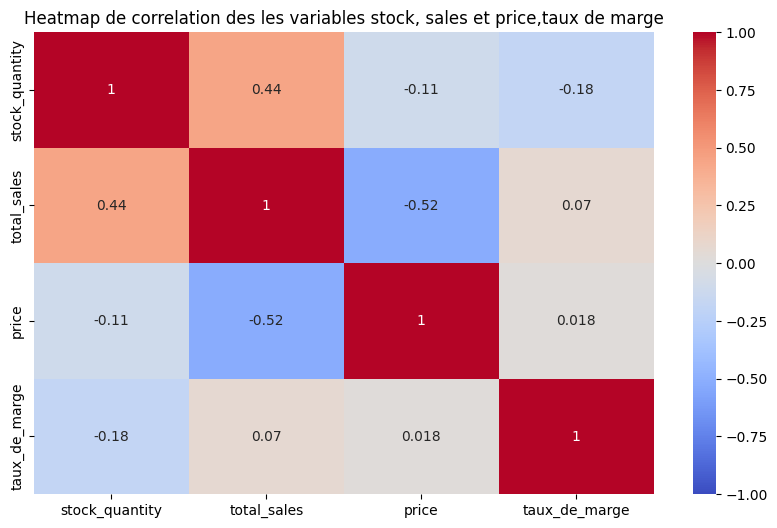

In [147]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns
#Création d'un heatmap de correlation avec les variables stock, sales et price
corr_matrix=df_final[['stock_quantity','total_sales','price','taux_de_marge']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Heatmap de correlation des les variables stock, sales et price,taux de marge')
plt.show()

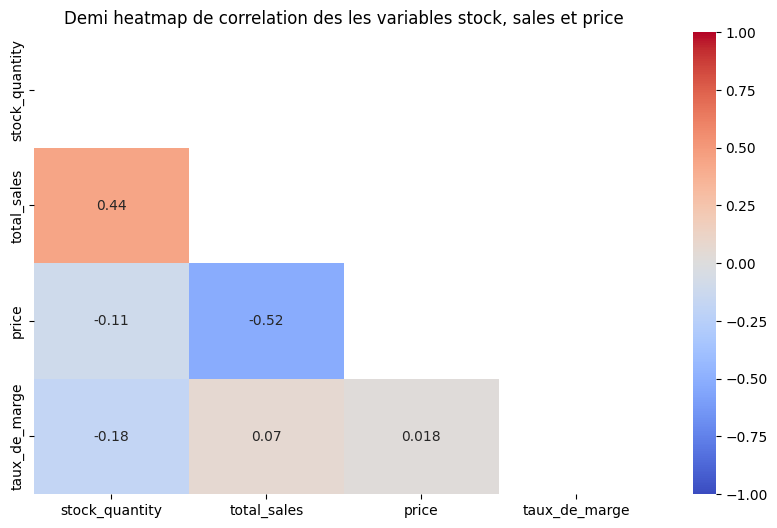

In [148]:
#on peut également créer un mask pour n'afficher qu'une demi heatmap
mask=np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, mask=mask,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Demi heatmap de correlation des les variables stock, sales et price')
plt.show()

In [150]:
#Que peut-on conclure des correlations ?

Les corrélations indiquent principalement des relations faibles ou modérées entre les variables.

La relation la plus notable est entre total_sales et price, avec une corrélation négative modérée, ce qui pourrait suggérer que des prix plus bas sont associés à des ventes plus élevées.

Les autres corrélations sont faibles, indiquant que les variables comme la quantité en stock, le taux de marge et le prix n'ont pas de relations linéaires significatives entre elles.

Ce type d'analyse est utile pour identifier des relations potentielles entre différentes variables, mais il est important de noter que la corrélation ne signifie pas causalité. Des analyses supplémentaires pourraient être nécessaires pour comprendre pleinement ces relations.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [149]:
#Mettre le dataset df_merge sur un fichier Excel
excel_file_path='df_merge.xlsx'
df_merge.to_excel(excel_file_path,index=False)
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.
import os
current_direction=os.getcwd()
print(f'Excel in: {current_direction}/{excel_file_path}')

Excel in: /content/df_merge.xlsx
